In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(-2821.2007)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 1590.11282  validloss 7768.74123±0.00000  bestvalidloss 7768.74123  last_update 0
train: iter 1  trainloss 946.43664  validloss 1089.15839±0.00000  bestvalidloss 1089.15839  last_update 0
train: iter 2  trainloss 782.15882  validloss 853.25373±0.00000  bestvalidloss 853.25373  last_update 0
train: iter 3  trainloss 755.43440  validloss 763.61665±0.00000  bestvalidloss 763.61665  last_update 0
train: iter 4  trainloss 600.63880  validloss 725.62883±0.00000  bestvalidloss 725.62883  last_update 0
train: iter 5  trainloss 477.29947  validloss 720.28963±0.00000  bestvalidloss 720.28963  last_update 0
train: iter 6  trainloss 323.05867  validloss 410.28943±0.00000  bestvalidloss 410.28943  last_update 0
train: iter 7  trainloss 225.39951  validloss 269.43948±0.00000  bestvalidloss 269.43948  last_update 0
train: iter 8  trainloss 170.68918  validloss 219.36941±0.00000  bestvalidloss 219.36941  last_update 0
train: iter 9  trainloss 111.98515  vali

train: iter 77  trainloss -908.27404  validloss -777.76615±0.00000  bestvalidloss -856.60489  last_update 9
train: iter 78  trainloss -597.82420  validloss -835.09501±0.00000  bestvalidloss -856.60489  last_update 10
train: iter 79  trainloss -470.81724  validloss -576.23641±0.00000  bestvalidloss -856.60489  last_update 11
train: iter 80  trainloss -678.51134  validloss -512.84195±0.00000  bestvalidloss -856.60489  last_update 12
train: iter 81  trainloss -778.59556  validloss -695.40399±0.00000  bestvalidloss -856.60489  last_update 13
train: iter 82  trainloss -939.61394  validloss -844.20185±0.00000  bestvalidloss -856.60489  last_update 14
train: iter 83  trainloss -920.16506  validloss -732.89061±0.00000  bestvalidloss -856.60489  last_update 15
train: iter 84  trainloss -963.02896  validloss -923.12580±0.00000  bestvalidloss -923.12580  last_update 0
train: iter 85  trainloss -805.86881  validloss -841.46540±0.00000  bestvalidloss -923.12580  last_update 1
train: iter 86  trainl

train: iter 152  trainloss -1206.95726  validloss -1200.51146±0.00000  bestvalidloss -1200.51146  last_update 0
train: iter 153  trainloss -1162.09787  validloss -960.99056±0.00000  bestvalidloss -1200.51146  last_update 1
train: iter 154  trainloss -938.35635  validloss -1078.26942±0.00000  bestvalidloss -1200.51146  last_update 2
train: iter 155  trainloss 392.99243  validloss 979.17534±0.00000  bestvalidloss -1200.51146  last_update 3
train: iter 156  trainloss -121.16805  validloss -5.06811±0.00000  bestvalidloss -1200.51146  last_update 4
train: iter 157  trainloss -316.38212  validloss 314.03503±0.00000  bestvalidloss -1200.51146  last_update 5
train: iter 158  trainloss -873.53932  validloss -659.15435±0.00000  bestvalidloss -1200.51146  last_update 6
train: iter 159  trainloss -778.56498  validloss -840.25849±0.00000  bestvalidloss -1200.51146  last_update 7
train: iter 160  trainloss -1171.75467  validloss -968.59276±0.00000  bestvalidloss -1200.51146  last_update 8
train: ite

train: iter 227  trainloss -1381.32612  validloss -1262.96895±0.00000  bestvalidloss -1300.06769  last_update 32
train: iter 228  trainloss -739.02215  validloss -1277.21188±0.00000  bestvalidloss -1300.06769  last_update 33
train: iter 229  trainloss -1141.59665  validloss -388.66618±0.00000  bestvalidloss -1300.06769  last_update 34
train: iter 230  trainloss -1279.75053  validloss -1176.40601±0.00000  bestvalidloss -1300.06769  last_update 35
train: iter 231  trainloss -1313.04634  validloss -1246.35834±0.00000  bestvalidloss -1300.06769  last_update 36
train: iter 232  trainloss -1388.72799  validloss -1344.15052±0.00000  bestvalidloss -1344.15052  last_update 0
train: iter 233  trainloss -1351.67506  validloss -1048.54199±0.00000  bestvalidloss -1344.15052  last_update 1
train: iter 234  trainloss -1290.68833  validloss -1332.97698±0.00000  bestvalidloss -1344.15052  last_update 2
train: iter 235  trainloss -1448.11092  validloss -1337.99291±0.00000  bestvalidloss -1344.15052  las

train: iter 300  trainloss -1482.04642  validloss -1334.56676±0.00000  bestvalidloss -1410.05965  last_update 22
train: iter 301  trainloss -1478.33273  validloss -1350.54709±0.00000  bestvalidloss -1410.05965  last_update 23
train: iter 302  trainloss -1469.93999  validloss -1271.85665±0.00000  bestvalidloss -1410.05965  last_update 24
train: iter 303  trainloss -1281.63276  validloss -1365.50796±0.00000  bestvalidloss -1410.05965  last_update 25
train: iter 304  trainloss -1452.46651  validloss -1342.78671±0.00000  bestvalidloss -1410.05965  last_update 26
train: iter 305  trainloss -1520.89916  validloss -1301.49148±0.00000  bestvalidloss -1410.05965  last_update 27
train: iter 306  trainloss -1411.02974  validloss -1411.00836±0.00000  bestvalidloss -1411.00836  last_update 0
train: iter 307  trainloss -1376.51203  validloss -1205.45972±0.00000  bestvalidloss -1411.00836  last_update 1
train: iter 308  trainloss -1351.13588  validloss -1398.68952±0.00000  bestvalidloss -1411.00836  

train: iter 374  trainloss -1375.87180  validloss -1033.75819±0.00000  bestvalidloss -1490.80752  last_update 1
train: iter 375  trainloss -1497.50874  validloss -1103.69644±0.00000  bestvalidloss -1490.80752  last_update 2
train: iter 376  trainloss -1408.90399  validloss -1424.36769±0.00000  bestvalidloss -1490.80752  last_update 3
train: iter 377  trainloss -1453.78034  validloss -1383.27270±0.00000  bestvalidloss -1490.80752  last_update 4
train: iter 378  trainloss -1517.29012  validloss -1197.23513±0.00000  bestvalidloss -1490.80752  last_update 5
train: iter 379  trainloss -1439.59667  validloss -1395.43085±0.00000  bestvalidloss -1490.80752  last_update 6
train: iter 380  trainloss -1476.91740  validloss -910.77309±0.00000  bestvalidloss -1490.80752  last_update 7
train: iter 381  trainloss -1518.72811  validloss -1393.27998±0.00000  bestvalidloss -1490.80752  last_update 8
train: iter 382  trainloss -1399.44377  validloss -1363.17344±0.00000  bestvalidloss -1490.80752  last_up

train: iter 447  trainloss -1612.56875  validloss -1484.15637±0.00000  bestvalidloss -1519.43164  last_update 11
train: iter 448  trainloss -1564.97225  validloss -1529.46589±0.00000  bestvalidloss -1529.46589  last_update 0
train: iter 449  trainloss -1225.34354  validloss -1293.15674±0.00000  bestvalidloss -1529.46589  last_update 1
train: iter 450  trainloss -1565.66991  validloss -1425.15126±0.00000  bestvalidloss -1529.46589  last_update 2
train: iter 451  trainloss -1574.33181  validloss -1510.41193±0.00000  bestvalidloss -1529.46589  last_update 3
train: iter 452  trainloss -1470.91985  validloss -1441.97491±0.00000  bestvalidloss -1529.46589  last_update 4
train: iter 453  trainloss -1575.09502  validloss -1312.35189±0.00000  bestvalidloss -1529.46589  last_update 5
train: iter 454  trainloss -1514.27404  validloss -1444.41895±0.00000  bestvalidloss -1529.46589  last_update 6
train: iter 455  trainloss -1521.89748  validloss -1484.00282±0.00000  bestvalidloss -1529.46589  last_

train: iter 520  trainloss -1489.36840  validloss -1274.62111±0.00000  bestvalidloss -1535.59525  last_update 11
train: iter 521  trainloss -1597.45811  validloss -1487.71332±0.00000  bestvalidloss -1535.59525  last_update 12
train: iter 522  trainloss -1552.41698  validloss -1362.49575±0.00000  bestvalidloss -1535.59525  last_update 13
train: iter 523  trainloss -1657.75633  validloss -1528.91945±0.00000  bestvalidloss -1535.59525  last_update 14
train: iter 524  trainloss -1644.11436  validloss -1579.07016±0.00000  bestvalidloss -1579.07016  last_update 0
train: iter 525  trainloss -1516.60506  validloss -1443.80021±0.00000  bestvalidloss -1579.07016  last_update 1
train: iter 526  trainloss -1435.35868  validloss -741.60954±0.00000  bestvalidloss -1579.07016  last_update 2
train: iter 527  trainloss -1564.45565  validloss -1370.17032±0.00000  bestvalidloss -1579.07016  last_update 3
train: iter 528  trainloss -1584.35455  validloss -1417.62906±0.00000  bestvalidloss -1579.07016  las

train: iter 593  trainloss -1661.40478  validloss -1511.38839±0.00000  bestvalidloss -1583.85091  last_update 11
train: iter 594  trainloss -1488.59027  validloss -1508.74234±0.00000  bestvalidloss -1583.85091  last_update 12
train: iter 595  trainloss -1627.38718  validloss -1339.84198±0.00000  bestvalidloss -1583.85091  last_update 13
train: iter 596  trainloss -1602.83476  validloss -1506.83702±0.00000  bestvalidloss -1583.85091  last_update 14
train: iter 597  trainloss -1554.61870  validloss -965.36858±0.00000  bestvalidloss -1583.85091  last_update 15
train: iter 598  trainloss -1629.18415  validloss -1359.96767±0.00000  bestvalidloss -1583.85091  last_update 16
train: iter 599  trainloss -1566.95092  validloss -1479.50613±0.00000  bestvalidloss -1583.85091  last_update 17
train: iter 600  trainloss -1611.27196  validloss -1502.98215±0.00000  bestvalidloss -1583.85091  last_update 18
train: iter 601  trainloss -1623.34735  validloss -1554.77635±0.00000  bestvalidloss -1583.85091 

train: iter 666  trainloss -1651.63275  validloss -1422.66176±0.00000  bestvalidloss -1604.06719  last_update 14
train: iter 667  trainloss -1681.78028  validloss -1565.22130±0.00000  bestvalidloss -1604.06719  last_update 15
train: iter 668  trainloss -1461.46442  validloss -1237.36208±0.00000  bestvalidloss -1604.06719  last_update 16
train: iter 669  trainloss -1652.89327  validloss -1533.57737±0.00000  bestvalidloss -1604.06719  last_update 17
train: iter 670  trainloss -1464.98911  validloss -1497.67773±0.00000  bestvalidloss -1604.06719  last_update 18
train: iter 671  trainloss -1619.65506  validloss -1459.74488±0.00000  bestvalidloss -1604.06719  last_update 19
train: iter 672  trainloss -1671.86786  validloss -1521.35197±0.00000  bestvalidloss -1604.06719  last_update 20
train: iter 673  trainloss -1447.80616  validloss -1523.53426±0.00000  bestvalidloss -1604.06719  last_update 21
train: iter 674  trainloss -1566.32145  validloss -1316.22202±0.00000  bestvalidloss -1604.06719

train: iter 739  trainloss -1598.02482  validloss -1514.12206±0.00000  bestvalidloss -1613.98943  last_update 27
train: iter 740  trainloss -1608.98643  validloss -1466.46756±0.00000  bestvalidloss -1613.98943  last_update 28
train: iter 741  trainloss -1665.93458  validloss -1480.74578±0.00000  bestvalidloss -1613.98943  last_update 29
train: iter 742  trainloss -1704.00215  validloss -1603.33666±0.00000  bestvalidloss -1613.98943  last_update 30
train: iter 743  trainloss -1567.58454  validloss -1584.97353±0.00000  bestvalidloss -1613.98943  last_update 31
train: iter 744  trainloss -1662.66293  validloss -1377.79215±0.00000  bestvalidloss -1613.98943  last_update 32
train: iter 745  trainloss -1703.66364  validloss -1569.79610±0.00000  bestvalidloss -1613.98943  last_update 33
train: iter 746  trainloss -1710.71758  validloss -1546.71503±0.00000  bestvalidloss -1613.98943  last_update 34
train: iter 747  trainloss -1657.34457  validloss -1573.66261±0.00000  bestvalidloss -1613.98943

train: iter 813  trainloss -1583.08957  validloss -1540.73299±0.00000  bestvalidloss -1615.23011  last_update 49
train: iter 814  trainloss -1660.91342  validloss -1475.19168±0.00000  bestvalidloss -1615.23011  last_update 50
train: iter 815  trainloss -1705.19745  validloss -1548.95869±0.00000  bestvalidloss -1615.23011  last_update 51
train: iter 816  trainloss -1709.90410  validloss -1593.08433±0.00000  bestvalidloss -1615.23011  last_update 52
train: iter 817  trainloss -1687.29413  validloss -1581.64841±0.00000  bestvalidloss -1615.23011  last_update 53
train: iter 818  trainloss -1684.06483  validloss -1571.72488±0.00000  bestvalidloss -1615.23011  last_update 54
train: iter 819  trainloss -1684.32864  validloss -1614.47143±0.00000  bestvalidloss -1615.23011  last_update 55
train: iter 820  trainloss -1689.65857  validloss -1560.05785±0.00000  bestvalidloss -1615.23011  last_update 56
train: iter 821  trainloss -1718.24771  validloss -1592.86013±0.00000  bestvalidloss -1615.23011

train: iter 887  trainloss -1728.57638  validloss -1615.75201±0.00000  bestvalidloss -1622.20208  last_update 18
train: iter 888  trainloss -1709.23022  validloss -1572.14815±0.00000  bestvalidloss -1622.20208  last_update 19
train: iter 889  trainloss -1710.91369  validloss -1585.75906±0.00000  bestvalidloss -1622.20208  last_update 20
train: iter 890  trainloss -1683.24328  validloss -1582.03535±0.00000  bestvalidloss -1622.20208  last_update 21
train: iter 891  trainloss -1682.75786  validloss -1602.49637±0.00000  bestvalidloss -1622.20208  last_update 22
train: iter 892  trainloss -1710.45474  validloss -1481.62223±0.00000  bestvalidloss -1622.20208  last_update 23
train: iter 893  trainloss -1730.55441  validloss -1584.30907±0.00000  bestvalidloss -1622.20208  last_update 24
train: iter 894  trainloss -1659.73670  validloss -1442.45122±0.00000  bestvalidloss -1622.20208  last_update 25
train: iter 895  trainloss -1615.89602  validloss -1513.23502±0.00000  bestvalidloss -1622.20208

train: iter 960  trainloss -1665.48901  validloss -1496.98116±0.00000  bestvalidloss -1628.97368  last_update 16
train: iter 961  trainloss -1731.49697  validloss -1441.63936±0.00000  bestvalidloss -1628.97368  last_update 17
train: iter 962  trainloss -1763.98767  validloss -1641.51914±0.00000  bestvalidloss -1641.51914  last_update 0
train: iter 963  trainloss -1612.58581  validloss -1647.78300±0.00000  bestvalidloss -1647.78300  last_update 0
train: iter 964  trainloss -1726.86842  validloss -1552.37927±0.00000  bestvalidloss -1647.78300  last_update 1
train: iter 965  trainloss -1712.42958  validloss -1604.07447±0.00000  bestvalidloss -1647.78300  last_update 2
train: iter 966  trainloss -1735.71029  validloss -1575.44978±0.00000  bestvalidloss -1647.78300  last_update 3
train: iter 967  trainloss -1607.49297  validloss -1576.89524±0.00000  bestvalidloss -1647.78300  last_update 4
train: iter 968  trainloss -1691.85723  validloss -1534.06225±0.00000  bestvalidloss -1647.78300  last

train: iter 1033  trainloss -1739.43493  validloss -1588.51048±0.00000  bestvalidloss -1647.78300  last_update 70
train: iter 1034  trainloss -1605.51462  validloss -1605.81303±0.00000  bestvalidloss -1647.78300  last_update 71
train: iter 1035  trainloss -1708.23395  validloss -1457.82008±0.00000  bestvalidloss -1647.78300  last_update 72
train: iter 1036  trainloss -1682.04284  validloss -1574.20782±0.00000  bestvalidloss -1647.78300  last_update 73
train: iter 1037  trainloss -1738.34223  validloss -1563.45480±0.00000  bestvalidloss -1647.78300  last_update 74
train: iter 1038  trainloss -1702.90150  validloss -1586.92542±0.00000  bestvalidloss -1647.78300  last_update 75
train: iter 1039  trainloss -1720.41429  validloss -1506.76179±0.00000  bestvalidloss -1647.78300  last_update 76
train: iter 1040  trainloss -1615.80568  validloss -1539.14512±0.00000  bestvalidloss -1647.78300  last_update 77
train: iter 1041  trainloss -1721.05045  validloss -1531.07558±0.00000  bestvalidloss -1

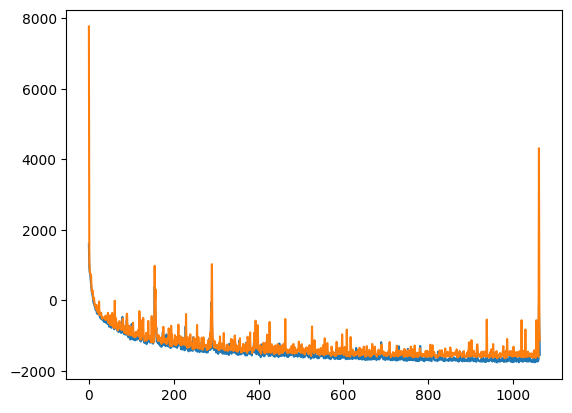

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 6.93166  validloss 7.29966±0.00000  bestvalidloss 7.29966  last_update 0
train: iter 1  trainloss 6.36043  validloss 6.64970±0.00000  bestvalidloss 6.64970  last_update 0
train: iter 2  trainloss 5.87462  validloss 6.12206±0.00000  bestvalidloss 6.12206  last_update 0
train: iter 3  trainloss 5.47874  validloss 5.68782±0.00000  bestvalidloss 5.68782  last_update 0
train: iter 4  trainloss 5.15463  validloss 5.33180±0.00000  bestvalidloss 5.33180  last_update 0
train: iter 5  trainloss 4.88352  validloss 5.01679±0.00000  bestvalidloss 5.01679  last_update 0
train: iter 6  trainloss 4.64030  validloss 4.76092±0.00000  bestvalidloss 4.76092  last_update 0
train: iter 7  trainloss 4.43525  validloss 4.53935±0.00000  bestvalidloss 4.53935  last_update 0
train: iter 8  trainloss 4.25556  validloss 4.35456±0.00000  bestvalidloss 4.35456  last_update 0
train: iter 9  trainloss 4.10474  validloss 4.17768±0.00000  bestvalidloss 4.17768  last_update 0
train: iter 10  trai

train: iter 98  trainloss -1.69761  validloss -1.86069±0.00000  bestvalidloss -1.87494  last_update 1
train: iter 99  trainloss -1.71484  validloss -1.88351±0.00000  bestvalidloss -1.88351  last_update 0
train: iter 100  trainloss -1.74615  validloss -1.96227±0.00000  bestvalidloss -1.96227  last_update 0
train: iter 101  trainloss -1.82253  validloss -1.98207±0.00000  bestvalidloss -1.98207  last_update 0
train: iter 102  trainloss -1.83528  validloss -2.00049±0.00000  bestvalidloss -2.00049  last_update 0
train: iter 103  trainloss -1.82822  validloss -2.08248±0.00000  bestvalidloss -2.08248  last_update 0
train: iter 104  trainloss -1.86791  validloss -2.09415±0.00000  bestvalidloss -2.09415  last_update 0
train: iter 105  trainloss -1.87319  validloss -2.13151±0.00000  bestvalidloss -2.13151  last_update 0
train: iter 106  trainloss -1.88267  validloss -2.05710±0.00000  bestvalidloss -2.13151  last_update 1
train: iter 107  trainloss -1.93222  validloss -2.19585±0.00000  bestvalidl

train: iter 180  trainloss -2.11404  validloss -2.44995±0.00000  bestvalidloss -2.50673  last_update 30
train: iter 181  trainloss -2.12223  validloss -2.35465±0.00000  bestvalidloss -2.50673  last_update 31
train: iter 182  trainloss -2.07929  validloss -2.40492±0.00000  bestvalidloss -2.50673  last_update 32
train: iter 183  trainloss -2.13861  validloss -2.26857±0.00000  bestvalidloss -2.50673  last_update 33
train: iter 184  trainloss -2.08081  validloss -2.45539±0.00000  bestvalidloss -2.50673  last_update 34
train: iter 185  trainloss -2.09516  validloss -2.50647±0.00000  bestvalidloss -2.50673  last_update 35
train: iter 186  trainloss -2.05563  validloss -2.47938±0.00000  bestvalidloss -2.50673  last_update 36
train: iter 187  trainloss -2.13150  validloss -2.40855±0.00000  bestvalidloss -2.50673  last_update 37
train: iter 188  trainloss -2.12175  validloss -2.36788±0.00000  bestvalidloss -2.50673  last_update 38
train: iter 189  trainloss -2.03012  validloss -2.34565±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-2.8044, -1.7347, -5.7155, -4.0889], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 72.23606  validloss 74.82805±0.00000  bestvalidloss 74.82805  last_update 0
train: iter 1  trainloss 50.49170  validloss 55.12262±0.00000  bestvalidloss 55.12262  last_update 0
train: iter 2  trainloss 34.55320  validloss 37.36978±0.00000  bestvalidloss 37.36978  last_update 0
train: iter 3  trainloss 25.48452  validloss 27.17738±0.00000  bestvalidloss 27.17738  last_update 0
train: iter 4  trainloss 19.88814  validloss 21.56359±0.00000  bestvalidloss 21.56359  last_update 0
train: iter 5  trainloss 15.93781  validloss 17.76919±0.00000  bestvalidloss 17.76919  last_update 0
train: iter 6  trainloss 13.28087  validloss 15.28212±0.00000  bestvalidloss 15.28212  last_update 0
train: iter 7  trainloss 11.25649  validloss 13.49240±0.00000  bestvalidloss 13.49240  last_update 0
train: iter 8  trainloss 9.80703  validloss 12.33617±0.00000  bestvalidloss 12.33617  last_update 0
train: iter 9  trainloss 8.75751  validloss 11.51128±0.00000  bestvalidloss 11.51128  last_u

train: iter 83  trainloss 3.45766  validloss 6.07661±0.00000  bestvalidloss 5.60201  last_update 3
train: iter 84  trainloss 3.47644  validloss 5.93316±0.00000  bestvalidloss 5.60201  last_update 4
train: iter 85  trainloss 3.42900  validloss 6.03359±0.00000  bestvalidloss 5.60201  last_update 5
train: iter 86  trainloss 3.41428  validloss 5.66223±0.00000  bestvalidloss 5.60201  last_update 6
train: iter 87  trainloss 3.45155  validloss 6.31305±0.00000  bestvalidloss 5.60201  last_update 7
train: iter 88  trainloss 3.44006  validloss 5.95645±0.00000  bestvalidloss 5.60201  last_update 8
train: iter 89  trainloss 3.43198  validloss 5.87854±0.00000  bestvalidloss 5.60201  last_update 9
train: iter 90  trainloss 3.44163  validloss 5.90665±0.00000  bestvalidloss 5.60201  last_update 10
train: iter 91  trainloss 3.47229  validloss 5.79526±0.00000  bestvalidloss 5.60201  last_update 11
train: iter 92  trainloss 3.42832  validloss 5.82764±0.00000  bestvalidloss 5.60201  last_update 12
train: 

train: iter 167  trainloss 3.33913  validloss 5.46870±0.00000  bestvalidloss 5.37332  last_update 43
train: iter 168  trainloss 3.35492  validloss 5.44140±0.00000  bestvalidloss 5.37332  last_update 44
train: iter 169  trainloss 3.30631  validloss 5.39710±0.00000  bestvalidloss 5.37332  last_update 45
train: iter 170  trainloss 3.33609  validloss 5.32693±0.00000  bestvalidloss 5.32693  last_update 0
train: iter 171  trainloss 3.29387  validloss 5.44255±0.00000  bestvalidloss 5.32693  last_update 1
train: iter 172  trainloss 3.41931  validloss 5.30652±0.00000  bestvalidloss 5.30652  last_update 0
train: iter 173  trainloss 3.37138  validloss 5.61096±0.00000  bestvalidloss 5.30652  last_update 1
train: iter 174  trainloss 3.34756  validloss 5.69860±0.00000  bestvalidloss 5.30652  last_update 2
train: iter 175  trainloss 3.31095  validloss 5.55547±0.00000  bestvalidloss 5.30652  last_update 3
train: iter 176  trainloss 3.27357  validloss 6.00420±0.00000  bestvalidloss 5.30652  last_update

train: iter 250  trainloss 3.23391  validloss 5.52750±0.00000  bestvalidloss 5.20369  last_update 51
train: iter 251  trainloss 3.26143  validloss 5.94564±0.00000  bestvalidloss 5.20369  last_update 52
train: iter 252  trainloss 3.22896  validloss 5.78698±0.00000  bestvalidloss 5.20369  last_update 53
train: iter 253  trainloss 3.24701  validloss 5.42227±0.00000  bestvalidloss 5.20369  last_update 54
train: iter 254  trainloss 3.24428  validloss 5.53031±0.00000  bestvalidloss 5.20369  last_update 55
train: iter 255  trainloss 3.23182  validloss 5.49608±0.00000  bestvalidloss 5.20369  last_update 56
train: iter 256  trainloss 3.25374  validloss 5.47699±0.00000  bestvalidloss 5.20369  last_update 57
train: iter 257  trainloss 3.25293  validloss 5.78220±0.00000  bestvalidloss 5.20369  last_update 58
train: iter 258  trainloss 3.25477  validloss 5.49126±0.00000  bestvalidloss 5.20369  last_update 59
train: iter 259  trainloss 3.23174  validloss 5.80789±0.00000  bestvalidloss 5.20369  last_

train: iter 333  trainloss 3.19439  validloss 5.63910±0.00000  bestvalidloss 5.13901  last_update 72
train: iter 334  trainloss 3.20809  validloss 5.37409±0.00000  bestvalidloss 5.13901  last_update 73
train: iter 335  trainloss 3.20962  validloss 5.66854±0.00000  bestvalidloss 5.13901  last_update 74
train: iter 336  trainloss 3.19174  validloss 5.87837±0.00000  bestvalidloss 5.13901  last_update 75
train: iter 337  trainloss 3.23070  validloss 5.90099±0.00000  bestvalidloss 5.13901  last_update 76
train: iter 338  trainloss 3.13653  validloss 5.57797±0.00000  bestvalidloss 5.13901  last_update 77
train: iter 339  trainloss 3.24031  validloss 5.21992±0.00000  bestvalidloss 5.13901  last_update 78
train: iter 340  trainloss 3.21075  validloss 5.67864±0.00000  bestvalidloss 5.13901  last_update 79
train: iter 341  trainloss 3.19518  validloss 5.37526±0.00000  bestvalidloss 5.13901  last_update 80
train: iter 342  trainloss 3.23158  validloss 5.25361±0.00000  bestvalidloss 5.13901  last_

train: iter 417  trainloss 3.16089  validloss 6.05658±0.00000  bestvalidloss 5.09821  last_update 30
train: iter 418  trainloss 3.18619  validloss 5.21765±0.00000  bestvalidloss 5.09821  last_update 31
train: iter 419  trainloss 3.16478  validloss 5.49598±0.00000  bestvalidloss 5.09821  last_update 32
train: iter 420  trainloss 3.15060  validloss 5.29592±0.00000  bestvalidloss 5.09821  last_update 33
train: iter 421  trainloss 3.16537  validloss 5.31402±0.00000  bestvalidloss 5.09821  last_update 34
train: iter 422  trainloss 3.24530  validloss 5.17390±0.00000  bestvalidloss 5.09821  last_update 35
train: iter 423  trainloss 3.18914  validloss 5.43345±0.00000  bestvalidloss 5.09821  last_update 36
train: iter 424  trainloss 3.18980  validloss 5.69071±0.00000  bestvalidloss 5.09821  last_update 37
train: iter 425  trainloss 3.14478  validloss 5.50747±0.00000  bestvalidloss 5.09821  last_update 38
train: iter 426  trainloss 3.19215  validloss 5.36677±0.00000  bestvalidloss 5.09821  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-14.3435)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(4.5727)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

2.588775341447449
tensor([-1.4130])
